# **School of Analytics**

# Part 1. Data processing using numpy and pandas

Try to complete the tasks without using loops (iteration is possible only by column names)

Do not forget to ask questions, they are also appreciated

**NB!** Please note that optional tasks are marked with *. You may attempt these task to earn extra point to you total mark

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

### Main Part (10 points)

1. Look at the data **(0.5 point)**
- Read csv file `data.csv`
- Print number of rows and columns
- Display first 3 rows

In [3]:
df = pd.read_csv('/content/data.csv')

In [4]:
df.shape

(11914, 16)

In [6]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [7]:
df.tail(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


2. Briefly describe the data **(0.5 point)**
- Calculate descriptive statistics for numerical data
- Look at the types and names of columns

In [8]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

3. Are there missing values in the columns? Process them, explain the chosen method **(1 point)**

In [11]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Так как нам нельзя просто удалять строки, чтобы не потерять значения, мы можем заменить их. Однако заменять на 0 нельзя, тк из описательной статистики мы видим, что в большинстве столбцов отсутствует значение 0, поэтому заменим на среднее. Также есть категориальные столбцы, там отсутствующие значения заменим наиболее часто встречающимися (мода).

In [12]:
df['Engine Fuel Type'].mode()

0    regular unleaded
Name: Engine Fuel Type, dtype: object

In [13]:
df['Engine Fuel Type'].fillna(value = df['Engine Fuel Type'].mode()[0], inplace = True)

In [14]:
df['Engine HP'].fillna(value = df['Engine HP'].mean(), inplace = True)

In [15]:
df['Engine Cylinders'].fillna(value = df['Engine Cylinders'].mean(), inplace = True)

In [16]:
df['Number of Doors'].fillna(value = df['Number of Doors'].mean(), inplace = True)

In [17]:
df['Market Category'].fillna(value = df['Market Category'].mode()[0], inplace = True)

In [18]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

4. Display **(1 point)**
- Unique values `Engine Fuel Type`
- Unique tuples (`Engine Fuel Type`, `Vehicle Size`)

In [19]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

In [20]:
l = []
for i in df[['Engine Fuel Type','Vehicle Size']].values:
  l.append(i[0] + ' ' + i[1])
print(set(l))

{'premium unleaded (recommended) Compact', 'premium unleaded (required) Midsize', 'flex-fuel (unleaded/E85) Midsize', 'regular unleaded Large', 'flex-fuel (premium unleaded recommended/E85) Large', 'diesel Midsize', 'flex-fuel (premium unleaded recommended/E85) Midsize', 'diesel Large', 'premium unleaded (recommended) Large', 'flex-fuel (unleaded/natural gas) Large', 'premium unleaded (recommended) Midsize', 'flex-fuel (unleaded/E85) Compact', 'flex-fuel (premium unleaded recommended/E85) Compact', 'electric Large', 'flex-fuel (unleaded/E85) Large', 'premium unleaded (required) Large', 'regular unleaded Compact', 'flex-fuel (premium unleaded required/E85) Midsize', 'regular unleaded Midsize', 'premium unleaded (required) Compact', 'electric Compact', 'diesel Compact', 'natural gas Compact', 'flex-fuel (premium unleaded required/E85) Large', 'electric Midsize'}


5. Print 25% and 75% quantile of price (`MSRP`) for `Make` = 'FIAT', `Transmission Type` = 'MANUAL', `Driven_Wheels` = 'rear wheel drive', try to write oneliner **(1 point)**

In [23]:
print(df[(df['Make'] == 'FIAT') & (df['Transmission Type'] == 'MANUAL') & (df['Driven_Wheels'] == 'rear wheel drive')]['MSRP'].quantile([.25,.75]))

0.25    26245.0
0.75    27845.0
Name: MSRP, dtype: float64


In [22]:
help(pd.DataFrame.quantile)

Help on function quantile in module pandas.core.frame:

quantile(self, q: 'float | AnyArrayLike | Sequence[float]' = 0.5, axis: 'Axis' = 0, numeric_only: 'bool | lib.NoDefault' = <no_default>, interpolation: 'QuantileInterpolation' = 'linear', method: "Literal['single', 'table']" = 'single') -> 'Series | DataFrame'
    Return values at the given quantile over requested axis.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        Value between 0 <= q <= 1, the quantile(s) to compute.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Equals 0 or 'index' for row-wise, 1 or 'columns' for column-wise.
    numeric_only : bool, default True
        If False, the quantile of datetime and timedelta data will be
        computed as well.
    
        .. deprecated:: 1.5.0
            The default value of ``numeric_only`` will be ``False`` in a future
            version of pandas.
    
    interpolation : {'linear', 'lower', 'higher', 'midpo

6. Calculate mean price **(1 point)**
- For every `Engine Fuel Type`
- For every tuple (`Engine Fuel Type`, `Vehicle Size`)

In [24]:
df.groupby('Engine Fuel Type')['MSRP'].mean()

Engine Fuel Type
diesel                                           40788.000000
electric                                         47943.030303
flex-fuel (premium unleaded recommended/E85)     48641.923077
flex-fuel (premium unleaded required/E85)       159429.351852
flex-fuel (unleaded/E85)                         36258.260289
flex-fuel (unleaded/natural gas)                 39194.166667
natural gas                                      28065.000000
premium unleaded (recommended)                   40812.831254
premium unleaded (required)                     101627.093579
regular unleaded                                 23012.123484
Name: MSRP, dtype: float64

In [25]:
df.groupby(['Engine Fuel Type','Vehicle Size'])['MSRP'].mean()

Engine Fuel Type                              Vehicle Size
diesel                                        Compact          29323.879310
                                              Large            52699.566667
                                              Midsize          45448.181818
electric                                      Compact          32894.222222
                                              Large            85255.555556
                                              Midsize          49800.000000
flex-fuel (premium unleaded recommended/E85)  Compact          40207.500000
                                              Large            66572.222222
                                              Midsize          38208.888889
flex-fuel (premium unleaded required/E85)     Large           139634.807692
                                              Midsize         177810.000000
flex-fuel (unleaded/E85)                      Compact          21864.485437
                             

7. Print mean and std `Engine HP` for 'Crossover' `Market Category` (note that you need to select all rows where `Market Category` contains 'Crossover') with `Engine Cylinders` <= 5 and `Year` > 2015 and `Driven_Wheels` is 'front wheel drive' or 'rear wheel drive', try to write oneliner **(2 points)**

In [28]:
print(df[(df['Market Category'].str.contains('Crossover')) & (df['Engine Cylinders'] <= 5) & (df['Year'] > 2015) & ((df['Driven_Wheels'] == 'front wheel drive') | (df['Driven_Wheels'] == 'rear wheel drive'))]['Engine HP'].mean())
print(df[(df['Market Category'].str.contains('Crossover')) & (df['Engine Cylinders'] <= 5) & (df['Year'] > 2015) & ((df['Driven_Wheels'] == 'front wheel drive') | (df['Driven_Wheels'] == 'rear wheel drive'))]['Engine HP'].std())

171.28299901120062
32.81334085568766


In [29]:
print(df[(df['Market Category'].str.contains('Crossover')) & (df['Engine Cylinders'] <= 5) & (df['Year'] > 2015) & ((df['Driven_Wheels'] == 'front wheel drive') | (df['Driven_Wheels'] == 'rear wheel drive'))]['Engine HP'].mean(), df[(df['Market Category'].str.contains('Crossover')) & (df['Engine Cylinders'] <= 5) & (df['Year'] > 2015) & ((df['Driven_Wheels'] == 'front wheel drive') | (df['Driven_Wheels'] == 'rear wheel drive'))]['Engine HP'].std())

171.28299901120062 32.81334085568766


In [26]:
df[df['Market Category'].str.contains('Crossover')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620


8. Make boxplots for numeric columns and describe how the data is distributed **(1 point)**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

<Axes: ylabel='Year'>

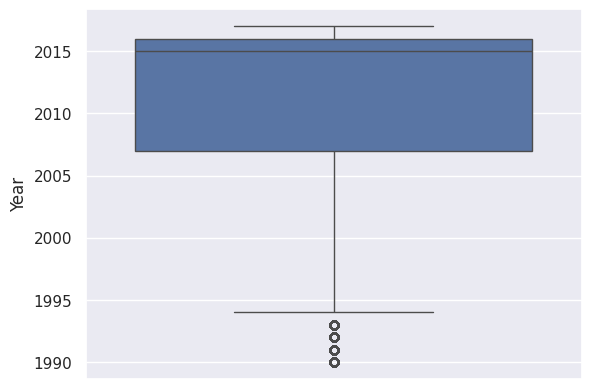

In [32]:
sns.boxplot(df, y = df['Year'])

Основная часть данных (от 25% до 75% данных) расположена в интервале 2008-2016, имеются выбросы - 1990,1991,1992,1993 года. Наиболее часто встречающееся значение - 2015.

<Axes: ylabel='Engine HP'>

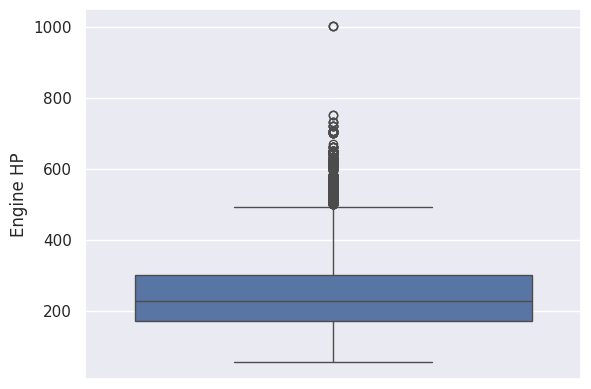

In [33]:
sns.boxplot(df, y = df['Engine HP'])

Основная часть данных (от 25% до 75% данных) расположена в интервале примерно 180-300, имеется много выбросов. Наиболее часто встречающееся значение - в районе 220. Разброс данных: от 40-50 до 500.

<Axes: ylabel='Engine Cylinders'>

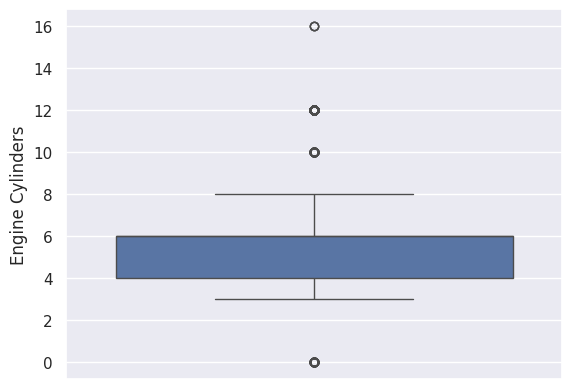

In [34]:
sns.boxplot(df, y = df['Engine Cylinders'])

Основная часть данных (от 25% до 75% данных) расположена в интервале 4-6, имеется 4 точки выброса. Разброс данных: от 3 до 8

<Axes: ylabel='Number of Doors'>

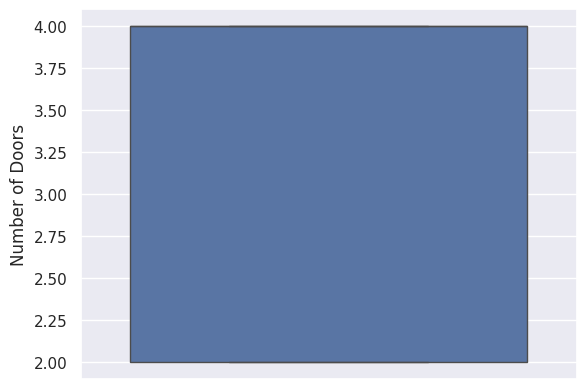

In [35]:
sns.boxplot(df, y = df['Number of Doors'])

Значения в диапазоне от 2 до 4

<Axes: ylabel='highway MPG'>

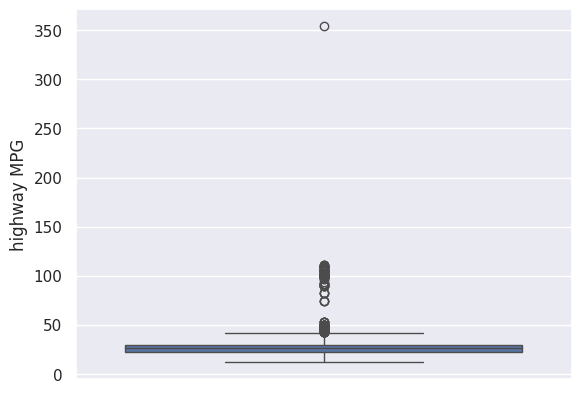

In [36]:
sns.boxplot(df, y = df['highway MPG'])

Основная часть данных (от 25% до 75% данных) расположена в интервале примерно 24-26, имеется много выбросов. Наиболее часто встречающееся значение - в районе 25. Разброс данных: от 10-15 до 45.

<Axes: ylabel='city mpg'>

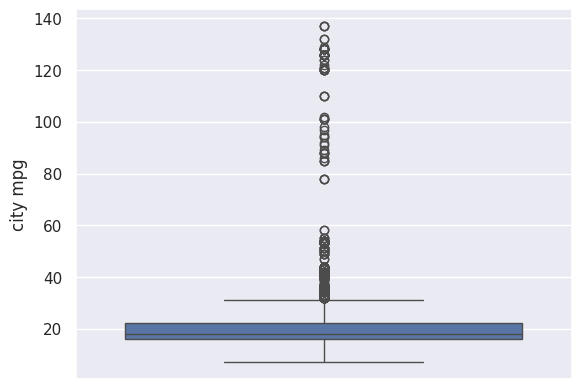

In [37]:
sns.boxplot(df, y = df['city mpg'])

Основная часть данных (от 25% до 75% данных) расположена в интервале примерно 18-22, имеется много выбросов. Наиболее часто встречающееся значение - в районе 19. Разброс данных примерно: от 5-6 до 32.

<Axes: ylabel='Popularity'>

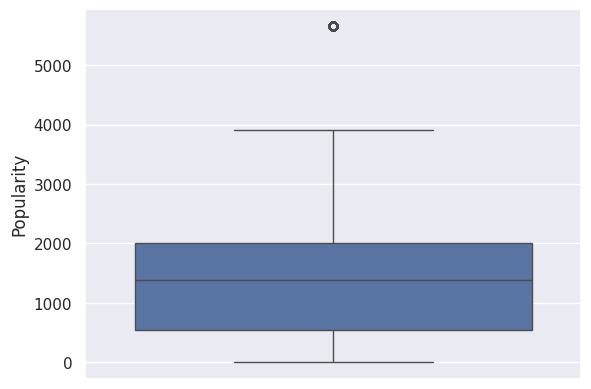

In [38]:
sns.boxplot(df, y = df['Popularity'])

Основная часть данных (от 25% до 75% данных) расположена в интервале 600-2000, имеется одна точка выброса. Наиболее часто встречающееся значение - 1400-1450 примерно.

<Axes: ylabel='MSRP'>

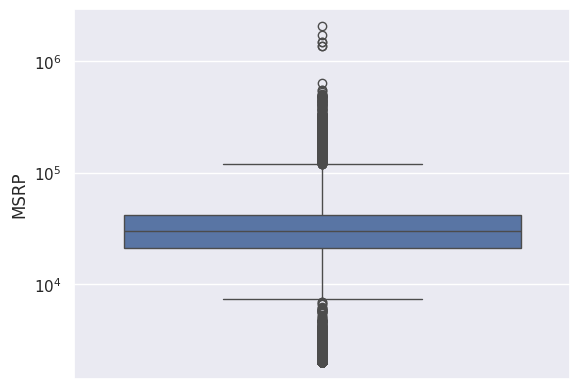

In [44]:
sns.boxplot(df, y = df['MSRP'],log_scale=True)

Имеется много выбросов. Медиана - в районе 30000

In [46]:
df['MSRP'].median()

29995.0

In [48]:
df['MSRP'].describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

9. Make violinplots harts for categorical columns, describe the destribution **(1 point)**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

<Axes: ylabel='Make'>

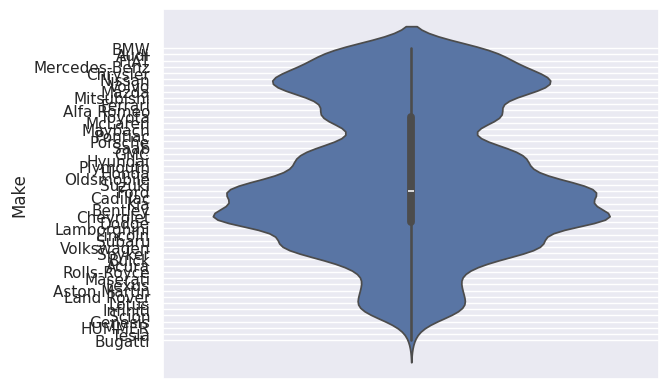

In [51]:
sns.violinplot(df, y = df['Make'])

<Axes: ylabel='Model'>

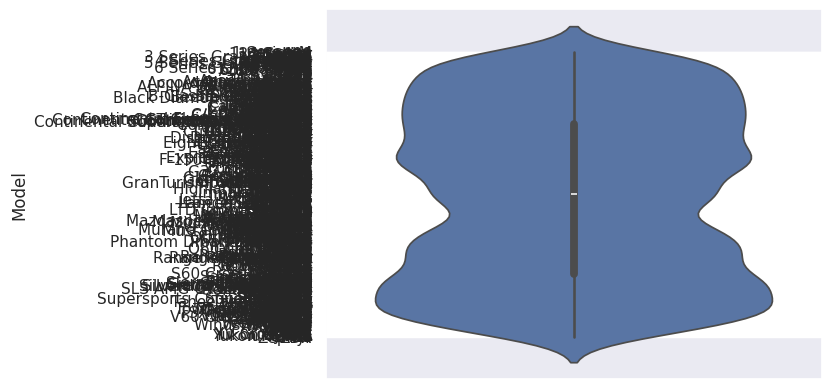

In [52]:
sns.violinplot(df, y = df['Model'])

<Axes: ylabel='Engine Fuel Type'>

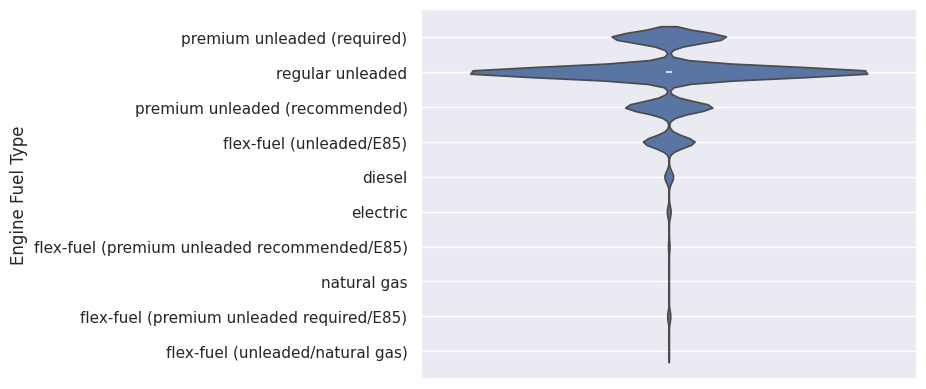

In [53]:
sns.violinplot(df, y = df['Engine Fuel Type'])

<Axes: ylabel='Transmission Type'>

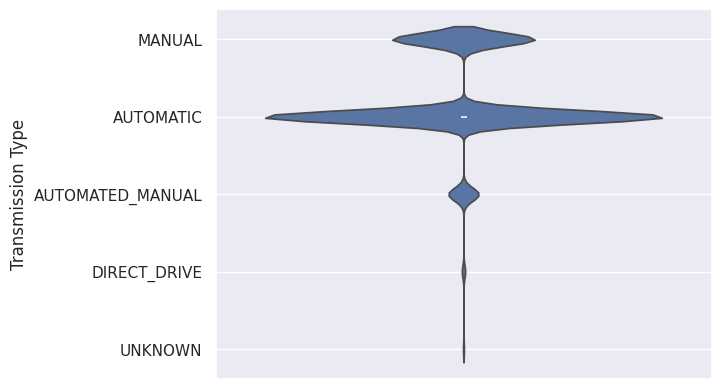

In [54]:
sns.violinplot(df, y = df['Transmission Type'])

<Axes: ylabel='Driven_Wheels'>

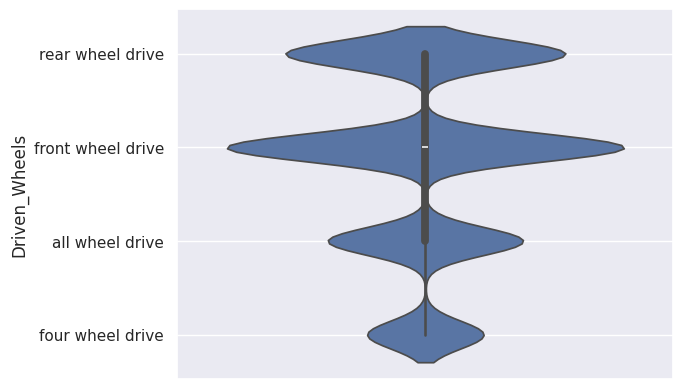

In [55]:
sns.violinplot(df, y = df['Driven_Wheels'])

<Axes: ylabel='Market Category'>

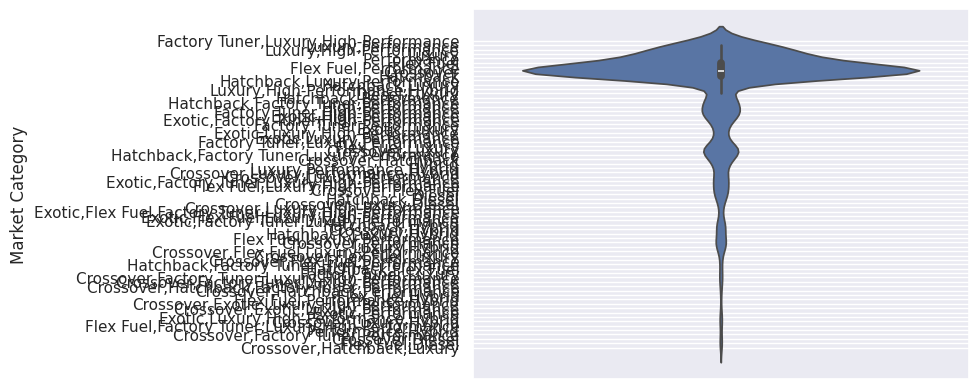

In [57]:
sns.violinplot(df, y = df['Market Category'])

<Axes: ylabel='Vehicle Size'>

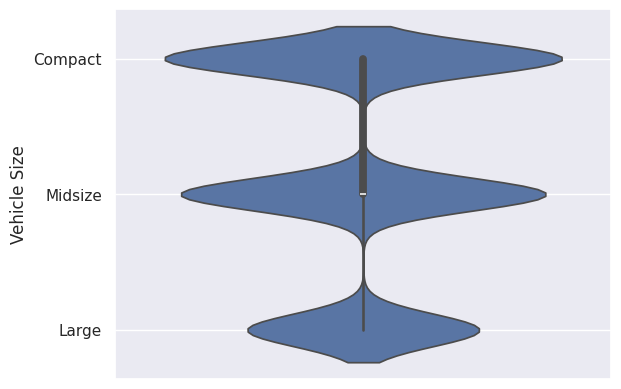

In [58]:
sns.violinplot(df, y = df['Vehicle Size'])

<Axes: ylabel='Vehicle Style'>

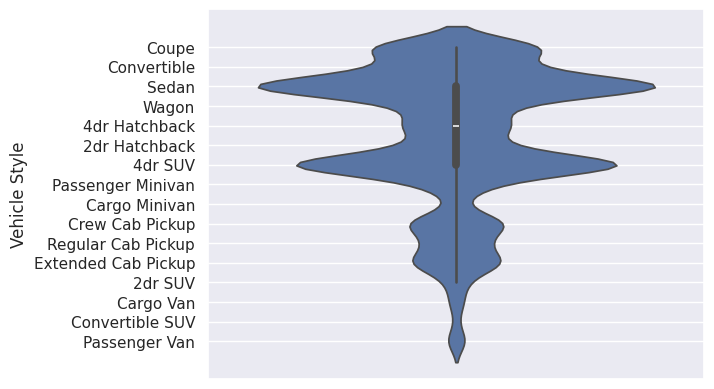

In [59]:
sns.violinplot(df, y = df['Vehicle Style'])

10. Write hypotheses you may have about the dependencies between the columns, check them using plots **(1 point)**

In [62]:
correl_matrix = df.corr().round(2)

<ipython-input-62-f36f288f12db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_matrix = df.corr().round(2)


<Axes: >

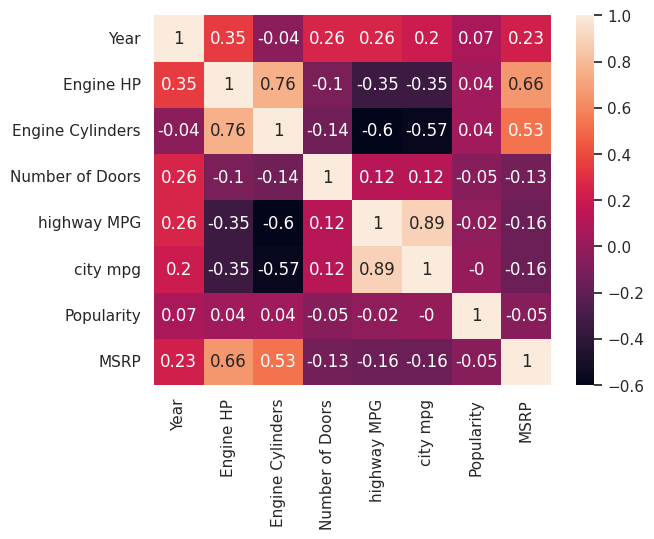

In [63]:
sns.heatmap(data=correl_matrix, annot = True)

In [66]:
corr_df = df.apply(lambda x: pd.factorize(x)[0]).corr(method = 'pearson',min_periods=1)
corr_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.146679,0.056555,0.125314,0.077335,0.035983,-0.007623,-0.007089,0.010233,0.091964,0.058343,0.018469,0.037096,0.041197,1.000000,0.150114
Model,0.146679,1.000000,0.030154,0.048738,0.247671,0.039599,0.061331,0.121012,0.166286,0.041139,0.105175,0.292929,0.001895,0.024103,0.146679,0.575596
Year,0.056555,0.030154,1.000000,-0.112612,-0.060284,-0.035584,-0.051180,-0.033085,-0.027108,0.011303,-0.029871,0.028435,-0.003886,0.022040,0.056555,0.105827
Engine Fuel Type,0.125314,0.048738,-0.112612,1.000000,-0.029586,0.040353,0.142289,0.095446,0.133396,0.033108,0.142529,0.193962,0.126147,0.089972,0.125314,0.052595
Engine HP,0.077335,0.247671,-0.060284,-0.029586,1.000000,0.143328,0.000241,0.027493,0.008791,0.067487,0.042757,0.042068,-0.012536,0.048368,0.077335,0.215670
Engine Cylinders,0.035983,0.039599,-0.035584,0.040353,0.143328,1.000000,0.088309,-0.064286,-0.095265,0.146571,0.106575,-0.062026,0.362440,0.461786,0.035983,0.120125
Transmission Type,-0.007623,0.061331,-0.051180,0.142289,0.000241,0.088309,1.000000,0.074258,0.242701,-0.009973,0.223893,-0.007913,0.102929,0.140700,-0.007623,0.120954
Driven_Wheels,-0.007089,0.121012,-0.033085,0.095446,0.027493,-0.064286,0.074258,1.000000,0.136700,-0.035121,0.084767,0.205138,0.051900,0.013975,-0.007089,0.084226
Number of Doors,0.010233,0.166286,-0.027108,0.133396,0.008791,-0.095265,0.242701,0.136700,1.000000,-0.056252,0.253108,0.308792,0.078319,0.055451,0.010233,0.122694
Market Category,0.091964,0.041139,0.011303,0.033108,0.067487,0.146571,-0.009973,-0.035121,-0.056252,1.000000,-0.166617,0.112709,0.230022,0.286317,0.091964,0.037183


Мы видим, что больше всего коррелируют модель и цена, модель и Vehicle Style, Engine Cylinders и highway MPG

<Axes: xlabel='Model', ylabel='MSRP'>

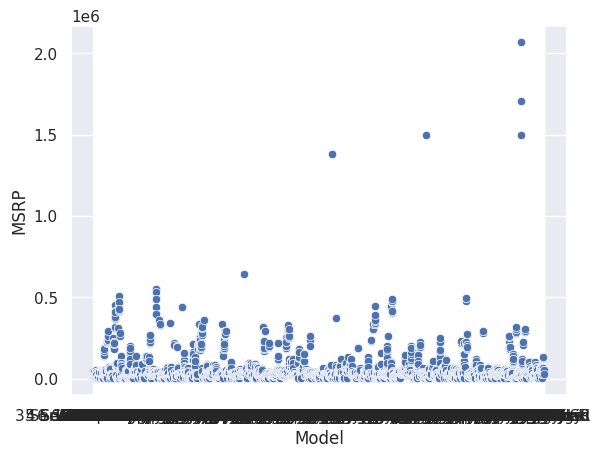

In [67]:
sns.scatterplot(df, x=df['Model'], y=df['MSRP'])

<Axes: xlabel='Model', ylabel='Vehicle Style'>

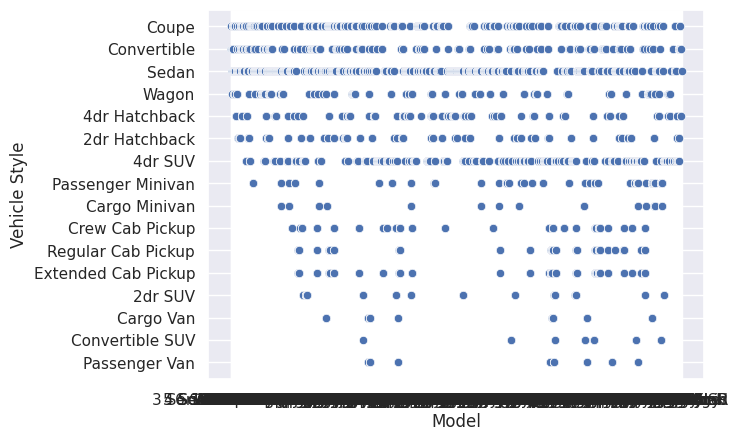

In [68]:
sns.scatterplot(df, x=df['Model'], y=df['Vehicle Style'])

<Axes: xlabel='Engine Cylinders', ylabel='highway MPG'>

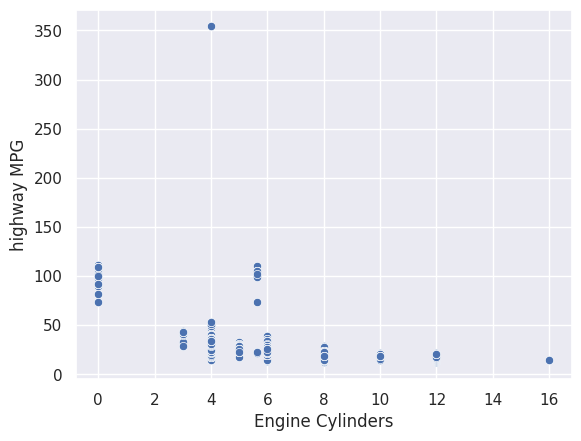

In [69]:
sns.scatterplot(df, x=df['Engine Cylinders'], y=df['highway MPG'])

### Extra Task (3 points)

11.* Replace values in column `Market Category` by first value
- Example: you have value 'Crossover,Hatchback,Luxury', you should replace it by 'Crossover' (note that separator is ',')
- Try to write oneliner
- Make piechart for `Market Category'

In [60]:
df['Market Category'] = df['Market Category'].apply(lambda x: x.split(',')[0])

<Axes: ylabel='Market Category'>

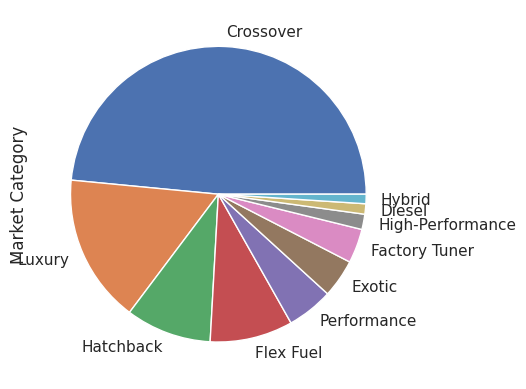

In [61]:
df['Market Category'].value_counts().plot(kind = 'pie')

# Part 2. Programming with Python (5 points)

### Big number

Children play a game with numbers. Each child say a number consisting of digits that he knows. Write a program that constructs a number consisting of the maximum digits of each child.

Input format: the first line contains the number N - the number of children in the group. Each of the next N lines contains a number.

Output Format: one big number.

Input:

`2`

`123`

`234`

Output:

`34`

Input:

`3`

`1234`

`7234`

`2323`

Output:

`473`

In [3]:
count = int(input())

result = 0

for _ in range(count):
    number = int(input())
    maximum = -1
    while number > 0:
        if number % 10 > maximum:
            maximum = number % 10
        number //= 10
    result = result * 10 + maximum

print(result)

4564


# Part 3*. Algorithms (7 points)

A string `s`, which consists of characters `(` and `)`, is a Bracket Sequence. Your answer should return the number of substrings that are Correct Bracket Sequences. An empty string is counted only when an empty string is `s`.


Sample input and output data:

Input: `''`

Output: `1`

*Explanation.* The input string is empty and has a single substring `''` - Correct Bracket Sequence.

Input: `'()()'`

Output: `3`

*Explanation.* Two different substrings `'()'` and the entire string `'()()'` are Correct Bracket Sequences; an empty string is not counted.

Input: `'((('`

Output: `0`


*Note.* A string `r`, which consists of characters `(` and `)`, is considered a Correct Bracket Sequence if any opening bracket `(` can be matched by a single closing bracket `)`. An empty string is also a Correct Bracket Sequence.


Examples: (()()) - correct; ())(() - incorrect

Please complete the following steps:
- In a text form, describe the algorithm used to solve the problem
- Estimate the asymptotic complexity of the algorithm in terms of time and additional memory
- Write a Python code to implement the solution

In [5]:
def is_balanced(seq):
    count = 0
    for el in seq:
        if el == '(':
            count += 1
        else:
            count -= 1
            if count < 0:
                return False
    if count == 0:
        return True
    else:
        return False

seq = input("Enter a sequence of brackets: ")
result = is_balanced(seq)

if result:
    print("The sequence is balanced.")
else:
    print("The sequence is not balanced.")

The sequence is not balanced.


In [12]:
def is_valid_sequence(seq):
    def is_balanced(seq):
        count = 0
        for el in seq:
            if el == '(':
                count += 1
            else:
                count -= 1
                if count < 0:
                    return False
        return count == 0
    
    count = 0
    for i in range(len(seq)):
        for j in range(i + 1, len(seq) + 1):
            if is_balanced(seq[i:j]):
                count += 1

    return count

# Input sequence from the user
input_sequence = input("Enter a sequence of brackets: ")
output_count = is_valid_sequence(input_sequence)
print(f"Number of correct bracket sequences in the input: {output_count}")

Number of correct bracket sequences in the input: 0
